In [38]:
from scipy.optimize import dual_annealing
import nevis
import numpy as np
import matplotlib.pyplot as plt

![SA performance](./img/simulated_annealing.png)

In [92]:
f = nevis.linear_interpolant()
points = []
pre_max = []
def wrapper(u):
    x, y = u
    points.append((x, y))
    z = f(x, y)
    if not pre_max:
        pre_max.append(z)
    else:
        pre_max.append(max(pre_max[-1], z))
    return -f(x, y)

In [216]:
points = []
pre_max = []
x_max, y_max = nevis.dimensions()
ret = dual_annealing(
    wrapper, 
    bounds=[(0, x_max), (0, y_max)],
    maxiter=int(2e3),
    initial_temp=1e5,
    # restart_temp_ratio=1e-3,
    # no_local_search=True,
    )

In [217]:
x, y = ret.x
z = -ret.fun

nevis.print_result(x, y, z)

Congratulations!
You landed at an altitude of 1345m.
  https://opentopomap.org/#marker=15/56.796782/-5.003539
You are 17m from the nearest named hill top, "Ben Nevis",
  ranked the 1st heighest in GB.
  http://hillsummits.org.uk/htm_summit/278.htm


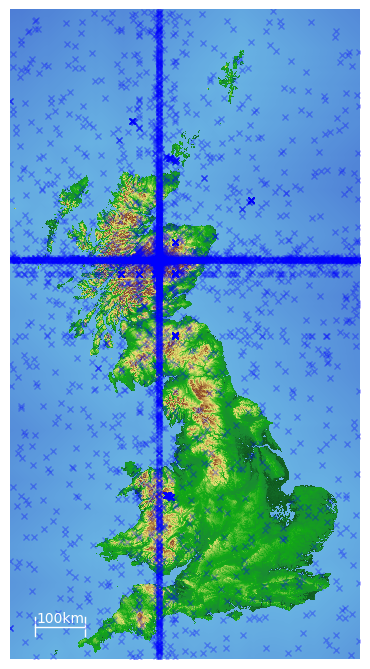

In [202]:
nevis.plot(
    points=np.array(points),
    zoom=1/40
)
plt.show()

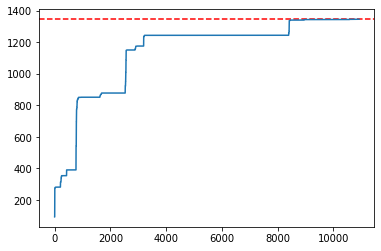

In [175]:

plt.axhline(y=1344.9, color='r', linestyle='--', label='Ben Nevis')
plt.plot(pre_max)
plt.show()